In [6]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install folium geopy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import plotly.express as px
import streamlit as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


Data Collection & Cleaning:


In [10]:

file = pd.read_csv("Telco-Customer-Churn.csv")
chr_df = pd.DataFrame(file)
chr_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
chr_df.columns = chr_df.columns.str.replace(' ', '_').str.lower()
chr_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
chr_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Handling Missing Data


In [13]:
chr_df['totalcharges'] = pd.to_numeric(chr_df['totalcharges'], errors='coerce')
chr_df['totalcharges'].fillna(chr_df['totalcharges'].median(), inplace=True)
chr_df.head()

C:\Users\FAESA\AppData\Local\Temp\ipykernel_7768\2679876075.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chr_df['totalcharges'].fillna(chr_df['totalcharges'].median(), inplace=True)


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Aggregation


In [14]:
pivot1 = pd.pivot_table(chr_df, 
                        values='monthlycharges', 
                        index='contract', 
                        aggfunc='mean')
print(pivot1)
print()
pivot2 = pd.pivot_table(chr_df, 
                        values='totalcharges', 
                        index='internetservice', 
                        columns='churn', 
                        aggfunc='sum',
                        margins=True)
print(pivot2)
print()
pivot3 = pd.pivot_table(chr_df, 
                        values='customerid', 
                        index='paymentmethod', 
                        columns='contract', 
                        aggfunc='count')
print(pivot3)
print()
pivot4 = pd.pivot_table(chr_df, 
                        values='tenure', 
                        index='gender', 
                        columns='churn', 
                        aggfunc='mean')
print(pivot4)




                monthlycharges
contract                      
Month-to-month       66.398490
One year             65.048608
Two year             60.770413

churn                      No         Yes           All
internetservice                                        
DSL              4.768382e+06   360016.50  5.128398e+06
Fiber optic      7.440366e+06  2483257.45  9.923623e+06
No               9.998668e+05    19652.95  1.019520e+06
All              1.320861e+07  2862926.90  1.607154e+07

contract                   Month-to-month  One year  Two year
paymentmethod                                                
Bank transfer (automatic)             589       391       564
Credit card (automatic)               543       398       581
Electronic check                     1850       347       168
Mailed check                          893       337       382

churn          No        Yes
gender                      
Female  37.858768  17.004260
Male    37.289524  18.963441


Duplicate Removal


In [15]:
chr_df.drop_duplicates()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Data Sampling

In [16]:

sample_df, _ = train_test_split(chr_df, test_size=0.8, stratify=chr_df['churn'], random_state=42)

print(sample_df.head())

      customerid  gender  seniorcitizen partner dependents  tenure  \
6217  1599-MMYRQ    Male              0     Yes        Yes      62   
6359  7148-XZPHA    Male              0     Yes        Yes      55   
877   7876-AEHIG  Female              0      No        Yes      51   
5129  0620-DLSLK  Female              0      No         No      13   
5898  8277-RVRSV  Female              0     Yes        Yes      33   

     phoneservice     multiplelines internetservice       onlinesecurity  ...  \
6217          Yes                No     Fiber optic                  Yes  ...   
6359          Yes                No     Fiber optic                   No  ...   
877            No  No phone service             DSL                  Yes  ...   
5129          Yes                No     Fiber optic                   No  ...   
5898          Yes               Yes              No  No internet service  ...   

         deviceprotection          techsupport          streamingtv  \
6217                 

Exploratory Data Analysis (EDA):

Summary Statistics Report


In [17]:
chr_df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:

chr_df['churn'].value_counts(normalize=True)


churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Data Visualization with Seaborn


Text(0.5, 1.0, 'Churn Distribution')

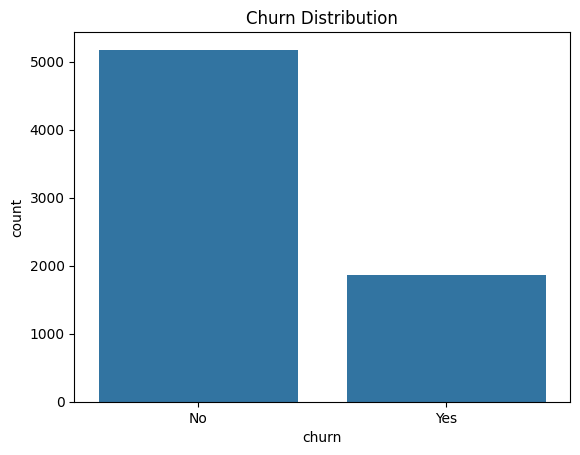

In [19]:
sns.countplot(x='churn', data=chr_df)
plt.title("Churn Distribution")


Visualizing Relationships

<Axes: xlabel='churn', ylabel='monthlycharges'>

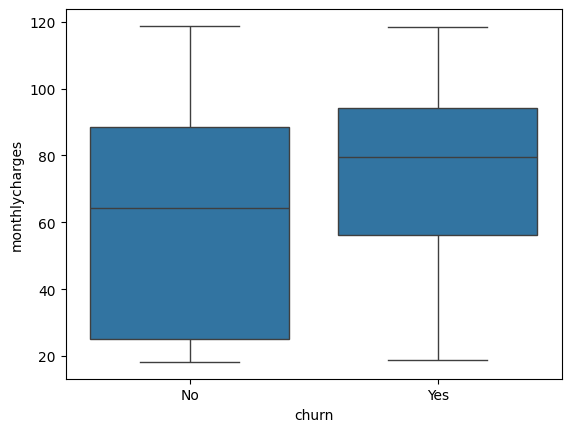

In [20]:
sns.boxplot(x='churn', y='monthlycharges', data=chr_df)


Pairwise Plotting

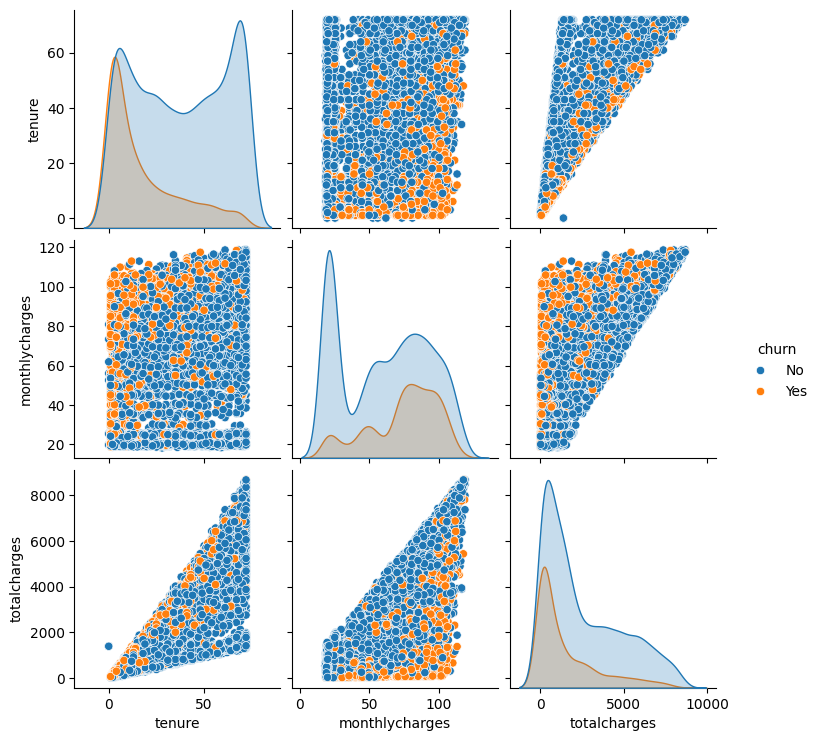

In [21]:
sns.pairplot(chr_df[['tenure', 'monthlycharges', 'totalcharges', 'churn']], hue='churn')


Machine Learning Models:


In [22]:
from sklearn.preprocessing import LabelEncoder

df_model = chr_df.copy()
for col in df_model.select_dtypes('object').columns:
    if col != 'customerid':
        df_model[col] = LabelEncoder().fit_transform(df_model[col])


Clustering with K-Means


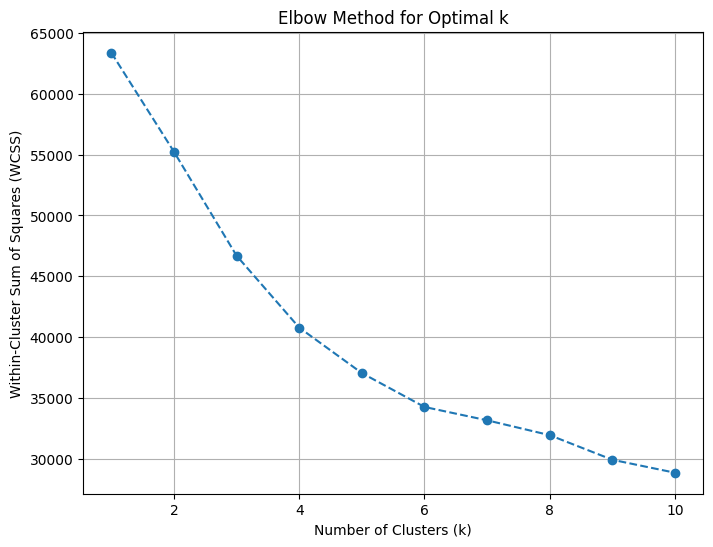

In [23]:

# Select relevant features
features = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
service_df = chr_df[features].copy()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in service_df.columns:
    le = LabelEncoder()
    service_df[col] = le.fit_transform(service_df[col])
    label_encoders[col] = le

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(service_df)#ensures all features have mean=0,variance =1

# Apply K-Means clustering with different values of k
wcss = []
k_range = range(1, 11)  # Testing k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = sum of squared distances to the closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

SVM for Classification


In [24]:


X = df_model.drop(['churn', 'customerid'], axis=1)
y = df_model['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)
print(classification_report(y_test, svm_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



c:\Users\FAESA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FAESA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\FAESA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Random Forest Model


In [25]:


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



Logistic Regression for Binary Classification

In [26]:


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



c:\Users\FAESA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Advanced Visualization & Reporting


Animated Data Visualizations


In [27]:


fig = px.scatter(
    chr_df, 
    x="tenure", 
    y="monthlycharges", 
    color="churn",
    size="totalcharges",
    animation_frame="tenure", 
    range_x=[0, 75], 
    range_y=[0, chr_df['monthlycharges'].max()],
    title="Customer Churn Animation over Tenure"
)
fig.show()


KPI Dashboard for Business Insights



In [28]:

churn_rate = chr_df['churn'].value_counts(normalize=True)['Yes']
avg_monthly_charge = chr_df['monthlycharges'].mean()
total_revenue = chr_df['totalcharges'].sum()

st.title("📊 Telco Churn Dashboard")

st.metric("Churn Rate", f"{churn_rate:.2%}")
st.metric("Avg. Monthly Charges", f"${avg_monthly_charge:.2f}")
st.metric("Total Revenue", f"${total_revenue:,.2f}")


2025-04-23 10:36:32.503 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 10:36:34.617 
  command:

    streamlit run c:\Users\FAESA\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-23 10:36:34.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 10:36:34.621 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 10:36:34.623 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 10:36:34.625 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 10:36:34.629 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-23 10:36:

DeltaGenerator()

Customer Segmentation Analysis

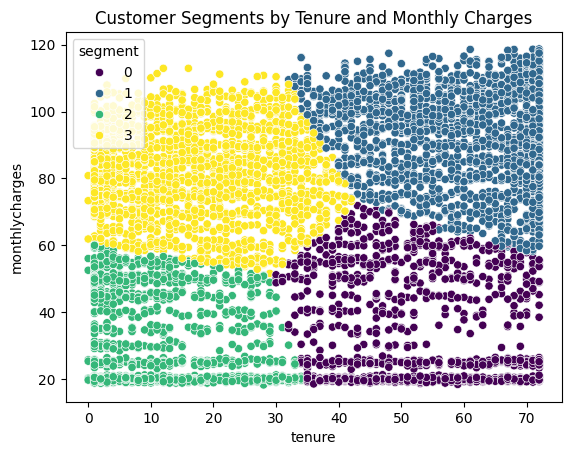

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

X = chr_df[['tenure', 'monthlycharges', 'totalcharges']]
X = X.fillna(0)
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
chr_df['segment'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
sns.scatterplot(data=chr_df, x='tenure', y='monthlycharges', hue='segment', palette='viridis')
plt.title("Customer Segments by Tenure and Monthly Charges")
plt.show()


In [30]:
chr_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn', 'segment'],
      dtype='object')

Geospatial Data Visualization with Folium

In [31]:
import folium

# Sample categories and made-up coordinates for visualizing them
payment_locations = {
    'electronic check': [37.77, -122.42],   # San Francisco
    'mailed check': [40.71, -74.01],        # New York
    'bank transfer (automatic)': [41.88, -87.63],  # Chicago
    'credit card (automatic)': [34.05, -118.24],   # LA
}

# Standardize text for consistency
chr_df['paymentmethod'] = chr_df['paymentmethod'].str.lower().str.strip()
chr_df['churn'] = chr_df['churn'].str.lower().str.strip()

# Initialize the map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add markers based on churn rate by payment method
for method, coords in payment_locations.items():
    churn_rate = chr_df[chr_df['paymentmethod'] == method]['churn'].value_counts(normalize=True).get('yes', 0)
    
    folium.CircleMarker(
        location=coords,
        radius=churn_rate * 60,
        popup=f"{method.title()}<br>Churn Rate: {churn_rate:.1%}",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Display the map directly in Jupyter Notebook
m



In [32]:
m.save("churn_payment_map.html")

In [33]:
chr_df.to_csv("telco_churn_report.csv", index=False)
print("file saved")

file saved
